In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Zver\Desktop\machine_learning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import (f1_score, accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay)


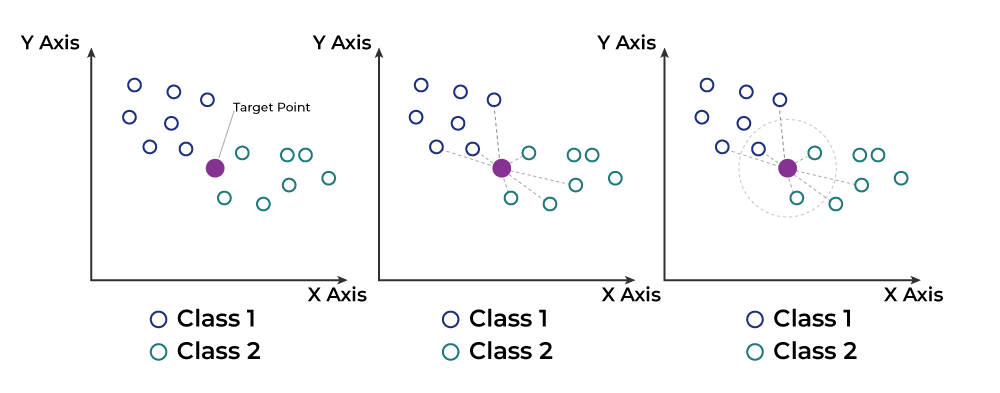

![Метрики](https://i2.wp.com/miro.medium.com/1*Lh6R4QArolCRdzF7jjSzDw.jpeg)

In [3]:
class KNNClassifier:
    def __init__(self, k=3, metric='euclidean'):
        self._validate_parameters(k, metric)
        self.k = k
        self.metric = metric 
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        X_train = np.asarray(X_train, dtype=np.float32) 
        y_train = np.asarray(y_train) 
    
        self.X_train = X_train
        self.y_train = y_train
        return self

    def predict(self, X_test):
        X_test = np.asarray(X_test, dtype=np.float32) 
        return np.array([self._predict_single(x) for x in X_test])

    def _predict_single(self, x):
        if self.metric == 'euclidean':
            distances = np.sqrt(((self.X_train - x)**2).sum(axis=1))
        else:
            distances = np.abs(self.X_train - x).sum(axis=1)
        
        # Нахождение k ближайших соседей:
        # функция argpartition частично сортирует массив и возвращает индексы k наименьших элементов
        k_nearest_indices = np.argpartition(distances, self.k)[:self.k]
        # Получение меток
        k_nearest_labels = self.y_train[k_nearest_indices]
        
        counts = {} # Словарь для подсчета частот меток
        for label in k_nearest_labels:
            counts[label] = counts.get(label, 0) + 1 
        
        # Поиск максимального количества голосов
        max_count = max(counts.values())
        # Сбор всех меток с максимальным счетом
        candidates = [label for label, count in counts.items() if count == max_count]
        return min(candidates) # Возврат метки с наименьшим значением

    def _validate_parameters(self, k, metric):
        if not isinstance(k, int) or k <= 0:
            raise ValueError("k должен быть положительным целым числом")
        if metric not in ['euclidean', 'manhattan']:
            raise ValueError(f"Неверная метрика: '{metric}'")

In [4]:
df = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\smoke_detector_task_filtered.csv', sep=',', encoding='utf-8')
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
label = 'Fire Alarm'
features = ['TVOC[ppb]', 'eCO2[ppm]', 'Temperature[C]', 'PM2.5', 'NC2.5', 'Humidity[%]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]']
X, y = df[features].values, df[label].values

In [6]:
X_train0, X_test1, y_train0, y_test1 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train0, y_train0)

In [7]:
knn = KNNClassifier(k=3, metric='manhattan')
knn.fit(X_train1, y_train1)

y_pred = knn.predict(X_test1)
print(y_pred) 
print(y_test1)

[1 1 1 ... 0 1 0]
[1 1 1 ... 0 1 0]


In [8]:
cm = confusion_matrix(y_test1, y_pred)
cm

array([[3324,    0],
       [   4, 8648]])

In [9]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3324
           1       1.00      1.00      1.00      8652

    accuracy                           1.00     11976
   macro avg       1.00      1.00      1.00     11976
weighted avg       1.00      1.00      1.00     11976

